## Project Description <font color='gray'>/ Описание проекта</font> 

We need to develop a neural network that will predict the absolute temperature on the surface of a star.
***
<font color='gray'>Нам необходимо разработать нейронную сеть, которая поможет предсказывать абсолютную температуру на поверхности звезды.</font> 


## Data Import<font color='gray'> / Загрузка данных</font> 

Let's import all necessary libraries:
***
<font color='gray'>Импортируем все необходимые для работы библиотеки:</font> 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from math import ceil
from math import sqrt
from sklearn.preprocessing import  MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler 
from sklearn.metrics import mean_squared_error


Extracting the data from the csv-file into 'data' variable:
***
<font color='gray'>Сохраним в переменную data данные из csv-файла:</font> 

In [8]:
data = pd.read_csv('/datasets/6_class.csv',  index_col=0)

In [9]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


According to the documentation, the following columns should be present in the protocol:

* 'Temperature (K)' - Absolute temperature T(K) - temperature on the surface of the star in Kelvin. quantitative variable.


* 'Luminosity(L/Lo)' - Relative luminosity L/Lo is the luminosity of the Sun's star. quantitative variable.


* 'Radius(R/Ro)' - Relative radius R/Ro is the star's radius relative to the Sun's radius. quantitative variable.


* 'Absolute value(Mv)' - The absolute estimated value of Mv is a value that characterizes the brightness of a star. quantitative variable.


* 'Star type' - Type of star: Brown dwarf - 0, Red dwarf - 1, White dwarf - 2, Lead star - 3, Supergiant - 4, Hypergiant - 5. Categorical variable.


* 'Star color' - Star color (white, red, blue, yellow, yellow-orange, etc.) - the color of the star, which is determined on the basis of spectral analysis. categorical variable.



***
<font color='gray'>

Согласно документации, в таблице должны содержаться следующие столбцы:

* 'Temperature (K)' - Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах. Количественная переменная.


* 'Luminosity(L/Lo)' - Относительная светимость L/Lo — светимость звезды относительно Солнца. Количественная переменная.


* 'Radius(R/Ro)' - Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца. Количественная переменная.


* '	Absolute magnitude(Mv)' - Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды. Количественная переменная.


* 'Star type' - Тип звезды: Коричневый карлик - 0, Красный карлик - 1, Белый карлик - 2, Звёзды главной последовательности - 3, Сверхгигант - 4, Гипергигант - 5. Категориальная переменная. 


* 'Star color' - Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа. Категориальная переменная. 


</font> 


## Data Preprocessing and Analysis<font color='gray'> / Предобработка и анализ данных</font> 

### Data Preprocessing <font color='gray'>/ Предобработка</font> 

Let's invoke `info()` method, which prints information about our dataset

***
<font color='gray'>
Вызовем метод `info( )` с  информацией о таблице:
</font> 


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


As we  can see, there are 240 records  and no missing values in the dataset.

***
<font color='gray'>
Видим, что в  датасете 240 записей, нет пропусков. 
</font> 


Переименуем все столбцы: сейчас они содержат заглавные буквы, пробелы, скобки. Чтобы было удобнее работать с ними - приведем их к нижнему регистру и будем использовать нижнее подчёркивание для разделения слов:

In [179]:
data = data.rename(columns={'Temperature (K)':'temperature', 
                     'Luminosity(L/Lo)':'luminosity', 'Radius(R/Ro)':'radius', 
                     'Absolute magnitude(Mv)':'abs_magnitude', 'Star type':'star_type', 'Star color':'star_color'})

Изучим датасет на наличие неявных дубликатов в категориальном столбце 'star_color'. Для этого выведем уникальные значения и их количество:

In [180]:
print(len(data['star_color'].unique()))
print(sorted(data['star_color'].unique()))


19
['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ', 'Blue-White', 'Blue-white', 'Orange', 'Orange-Red', 'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish', 'Yellowish', 'Yellowish White', 'white', 'yellow-white', 'yellowish']


От части невявных дубликатов можно избавиться просто приведя все значения в столбце к нижнему регистру и сократив лишние пробелы:

In [181]:
data['star_color'] = data['star_color'].str.strip().str.lower()
len(data['star_color'].unique())

13

Как видим, количество уникальных значений столбца 'star_color' уже сократилось на 6. Выведем оставшиеся уникальные значения на экран, подсчитав их количество:

In [182]:
data['star_color'].value_counts()

red                   112
blue                   56
blue-white             27
blue white             14
white                  10
yellow-white            8
yellowish white         3
yellowish               3
whitish                 2
orange                  2
orange-red              1
white-yellow            1
pale yellow orange      1
Name: star_color, dtype: int64

Как видим, в датасете совсем немного звезд с цветами `'yellowish', 'yellowish white', 'whitish', 'orange', 'white-yellow' , 'orange-red', 'pale yellow orange'`: каждого цвета не больше 3. Чтобы избежать искажения при обучении нейросети, удалим их (кроме 'white-yellow' т.к. это неявный дубликат цвета 'yellow-white'): 

In [183]:
color_list = ['yellowish', 'yellowish white', 'whitish', 'orange',  'orange-red', 'pale yellow orange'] 
data = data.query('star_color not in @color_list')

Избавимся от неявных дубликатов с помощью метода `replace()`:

In [184]:
data = data.replace({'star_color' : { 'blue white' : 'blue-white', 'yellow-white' : 'white-yellow'}})


Убедимся, что замена сработала корректно. Для этого выведем оставшиеся уникальные значения на экран:

In [185]:
sorted(data['star_color'].unique())

['blue', 'blue-white', 'red', 'white', 'white-yellow']

Проверим таблицу на наличие явных дубликатов:

In [186]:
data.duplicated().sum()

0

### Анализ данных

Для начала с помощью метода `describe()` выведем подробную информацию по таблице:

In [187]:
data.describe(include='all')

,temperature,luminosity,radius,abs_magnitude,star_type,star_color
count,228.000000,228.000000,228.000000,228.000000,228.000000,228
unique,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,red
freq,NaN,NaN,NaN,NaN,NaN,112
mean,10680.692982,107654.047662,236.607302,4.345969,2.473684,NaN
std,9742.810427,176985.132549,515.015990,10.664949,1.736930,NaN
min,1939.000000,0.000110,0.008400,-11.920000,0.000000,NaN
25%,3336.000000,0.000878,0.107500,-6.241250,1.000000,NaN
50%,5776.000000,0.030500,0.672500,10.260000,2.000000,NaN
75%,16417.500000,198650.000000,45.250000,13.830000,4.000000,NaN


Проанализируем столбец 'star_color'. Выведем гистограмму частот звездных цветов:

<AxesSubplot:title={'center':'Гистограмма частот звездных цветов'}>

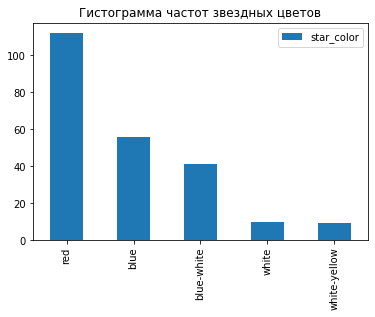

In [188]:
data['star_color'].value_counts().plot(kind='bar', legend=True, title = 'Гистограмма частот звездных цветов')

Наиболее часто у звезд встречается цвет 'red' (112 записей )и 'blue' (56 записей). Самые редкие значения - 'white' и 'white-yellow' - каждый встречается в таблице 10 раз.

Далее проанализируем столбец 'star_type'. Выведем гистограмму частот типов звезд:

<AxesSubplot:title={'center':'Гистограмма частот типов звезд'}>

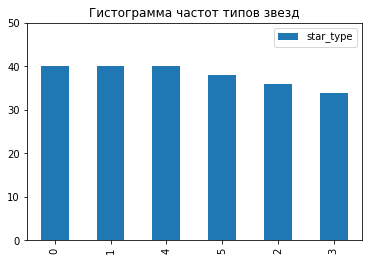

In [189]:
data['star_type'].value_counts().plot(kind='bar', legend=True, ylim = (0, 50)
                                     , title = 'Гистограмма частот типов звезд')

Как видим, каждый из 6 типов звезд встречается одинаковое количество раз. 

Теперь проанализируем столбцы с количественными данными. Для этого выведем гистограмму частот и график распределения значений для каждого из них, и для удобства дополнительно выведем минимум, максимум, медианное значение и стандартное отклонение:

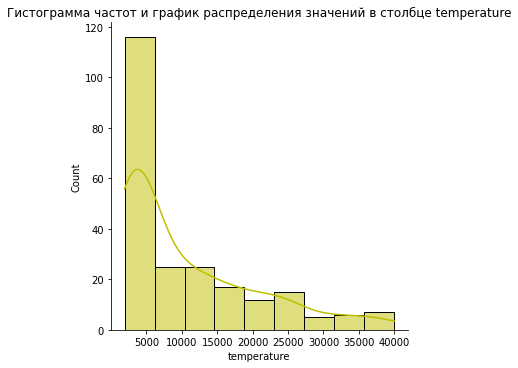

Минимальное значение равно 1939.00000
Медиана равна 5776.00000
Максимальное значение равно 40000.00000
Стандартное отклонение равно 9742.81043



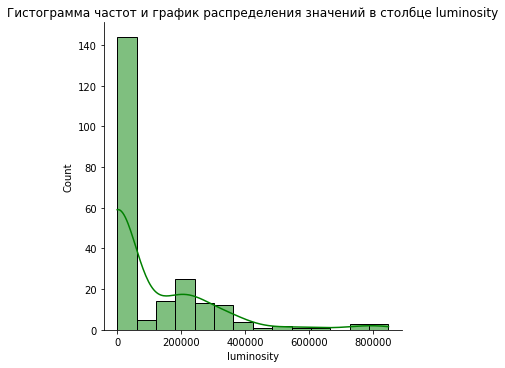

Минимальное значение равно 0.00011
Медиана равна 0.03050
Максимальное значение равно 849420.00000
Стандартное отклонение равно 176985.13255



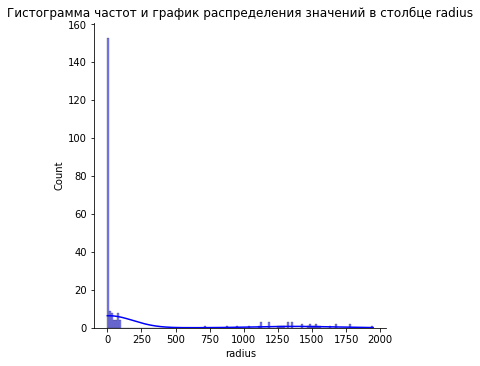

Минимальное значение равно 0.00840
Медиана равна 0.67250
Максимальное значение равно 1948.50000
Стандартное отклонение равно 515.01599



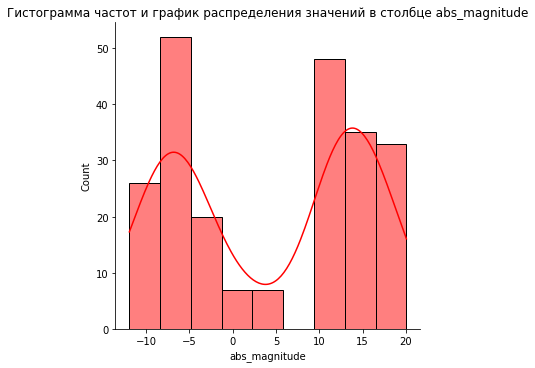

Минимальное значение равно -11.92000
Медиана равна 10.26000
Максимальное значение равно 20.06000
Стандартное отклонение равно 10.66495



In [190]:
cols = ['temperature', 'luminosity', 'radius', 'abs_magnitude']
i=0
colors = ['y', 'g', 'b', 'r']
for col in cols:   
    x = data[col]
    sb_plot = sns.displot(x.dropna(), color=colors[i], kde=True)
    sb_plot.set(title = f'Гистограмма частот и график распределения значений в столбце {col}')
    plt.show()
    mean = x.mean()
    standard_deviation = np.std(x, ddof=1)   
    print('Минимальное значение равно {:.5f}'.format(x.min()))
    print('Медиана равна {:.5f}'.format(x.median()))
    print('Максимальное значение равно {:.5f}'.format(x.max()))
    print('Стандартное отклонение равно {:.5f}'.format(standard_deviation))
    print()
    i+=1

У нас есть 2 категориальных столбца. Для дальнешейго обучени нейросети нам надо номализовать их при помощи One-Hot-Encoding. 
Для этого сначала категоризируем столбец star_type:

In [191]:
data['star_type'] = data['star_type'].astype('category')

Далее нам необходимо закодировать категориальные переменные. Сделаем это с помощью функции `get_dummies` из библиотеки pandas, в качестве параметра укажем drop_first=True:

In [192]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [193]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 239
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature              228 non-null    int64  
 1   luminosity               228 non-null    float64
 2   radius                   228 non-null    float64
 3   abs_magnitude            228 non-null    float64
 4   star_type_1              228 non-null    uint8  
 5   star_type_2              228 non-null    uint8  
 6   star_type_3              228 non-null    uint8  
 7   star_type_4              228 non-null    uint8  
 8   star_type_5              228 non-null    uint8  
 9   star_color_blue-white    228 non-null    uint8  
 10  star_color_red           228 non-null    uint8  
 11  star_color_white         228 non-null    uint8  
 12  star_color_white-yellow  228 non-null    uint8  
dtypes: float64(3), int64(1), uint8(9)
memory usage: 10.9 KB


Для нормализации числовых данных нам надо применить StandardScaler. Но сначала создадим переменные `features` и `target` для признаков и целевого признака:

In [245]:
features = data_ohe.drop(['temperature'], axis=1)
target = data_ohe['temperature']

Затем разобьем данные на тренировочные и тестовые выборки:

In [246]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345, shuffle=True)

Теперь к нормализируем выборки, содержащие признаки, применим StandardScaler():

In [247]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Вывод

В этой части работы мы:

* Изучили датасет. В нем 240 записей, нет пропусков и явных дубликатов

* Удалили столбец 'Unnamed: 0'

* Переименовали все столбцы, потому что они содержали заглавные буквы, пробелы, скобки. 

* Удалили цвета 'yellowish', 'yellowish white', 'whitish', 'orange', 'orange-red', 'pale yellow orange', которые встречались в датасете 1-3 раза, чтобы избежать искажений при обучении нейросети.

* Избавились от неявных дубликатов в категориальном столбце 'star_color'. Сократили количество уникальных значений столбца с 19 до 5

Также мы проанализировали каждый из столбцов:

* 'star_color': цвет 'red'  встречается чаще всего - 112 раз, 'blue'- 56 записей. Реже всего: Самые редкие значения - 'white' и 'white-yellow' - 10 раз каждый.

* 'star_type': каждый из 6 типов звезд встречается одинаковое количество раз.

* 'temperature': принимает значения от 1939 до 40000. Медиана - 5776, стандартное отклонение - 9552.4250.

* 'luminosity': принимает значения от 0.000080 до 849420. Медиана - 0.07050, стандартное отклонение - 179432.24494.

* 'radius': принимает значения от 00840 до 1948.5. Медиана - 0.76250, стандартное отклонение - 517.15576.

* 'abs_magnitude': принимает значения от -11.92 до 20.06. Медиана - 8.313, стандартное отклонение -10.53251.


Для нормализации данных мы категоризировали столбец star_type. Закодировали категориальные переменные с помощью функции get_dummies и применили StandardScaler для нормализации числовых данных. 

Помимо этого разбили данные на тренировочные и тестовые выборки.




## Построение базовой нейронной сети

Преобразуем выборки с данными в тензоры. 

In [248]:
X_train = torch.FloatTensor(features_train)
X_test = torch.FloatTensor(features_test)
y_train = torch.FloatTensor(target_train.values)
y_test = torch.FloatTensor(target_test.values)

Разработаем архитектуру нашей нейросети. На входном слое будет 15 нейронов. На выходном - 1.

В нашей нейросети будет 2 скрытых слоя. Каждый из них будет содержать по 8 нейронов:

In [249]:
n_in_neurons = 12
n_hidden_neurons_1 = 8
n_hidden_neurons_2 = 8
n_out_neurons = 1 

В качестве функции активации будем использовать Hardswish(), для борьбы с переобучением и недообучением - BatchNorm: 

In [250]:
net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Hardswish(),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_1),  
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
    
)

В качестве оптимизатора - Adam(). Для того, чтобы выбрать оптимальный параметр - переберем значения learning rate:

In [251]:
learning_rates = [0.001, 0.005,  0.009, 0.015]

In [252]:
cols = ['learning_rate', 'last_rmse', 'rmse_mean']
rate_rmse = []
for rate in learning_rates:
    optimizer = torch.optim.Adam(net.parameters(), lr=rate)

    loss = nn.MSELoss()

    batch_size = 50

    num_epochs = 450

    num_batches = ceil(len(X_train)/batch_size)

    rmse_mean = []
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train)) # создали случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size # посчитали номер стартового объекта батча
            optimizer.zero_grad()

            batch_indexes = order[start_index : start_index + batch_size] # извлекли индексы объектов текущего обатча
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = net.forward(X_batch).flatten()

            loss_value = loss(preds, y_batch)

            loss_value.backward()

            optimizer.step()

        if epoch % 10 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test)
            rmse = sqrt(mean_squared_error(y_test.detach().numpy(), test_preds.detach().numpy()))
            rmse_mean.append(rmse)

        if epoch == num_epochs - 1:
            rate_rmse.append([rate, rmse, np.mean(rmse_mean)])
            #print(rmse)
rmse_compare_lr = pd.DataFrame(data = rate_rmse, columns=cols)

In [253]:
rmse_compare_lr

,learning_rate,last_rmse,rmse_mean
0,0.001,5722.203771,10135.590606
1,0.005,4365.404678,4756.608249
2,0.009,4175.533499,4304.984751
3,0.015,4364.975601,4306.797277


In [254]:
rmse_compare_lr['rmse_diff'] = rmse_compare_lr['rmse_mean'] - rmse_compare_lr['last_rmse']
rmse_compare_lr

,learning_rate,last_rmse,rmse_mean,rmse_diff
0,0.001,5722.203771,10135.590606,4413.386834
1,0.005,4365.404678,4756.608249,391.203571
2,0.009,4175.533499,4304.984751,129.451252
3,0.015,4364.975601,4306.797277,-58.178324


Значит, будем использовать lr=0.009

Проведите обучение модели с выбранным уровнем learning rate: 


In [255]:
rmse_batch = []
net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Hardswish(),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_1),  
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
    
)

optimizer = torch.optim.Adam(net.parameters(), lr=0.009)

loss = nn.MSELoss()

batch_size = 50

num_epochs = 450

num_batches = ceil(len(X_train)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(X_train)) # создали случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size # посчитали номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index : start_index + batch_size] # извлекли индексы объектов текущего обатча
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
     
        loss_value = loss(preds, y_batch)

        loss_value.backward()
       
        optimizer.step()

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(X_test)
        rmse = sqrt(mean_squared_error(y_test.detach().numpy(), test_preds.detach().numpy()))
        rmse_batch.append(rmse)

        print(rmse)

15462.464486620494
15430.156447683867
14701.465505180087
9904.10298815597
6435.267515806938
5694.209163703069
5575.812048482266
5386.204229325138
5122.906596845193
5116.0670441267675
4947.553536850309
4828.948746880629
4864.018092071616
4731.70096265603
4761.132848388081
4718.252218777627
4606.859016727123
4696.196546142421
4769.959119321674
4720.050635321617
4662.116686656394
4789.960542634981
4488.126335120258
4489.283907261825
4685.656197375134
4518.730352654383
4474.800330741026
4544.711211947355
4592.7941386480625
4382.275664537775
4319.174226631752
4261.123326072598
4324.630851298178
4629.964362713821
4388.182995272645
4618.122778792266
4492.632413184947
4416.926533235525
4186.172476140944
4233.177766170469
4394.16749794543
4296.60377507631
4328.965927331838
4228.31077381973
4182.197747596352
4240.866185108886


Постром график «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах:

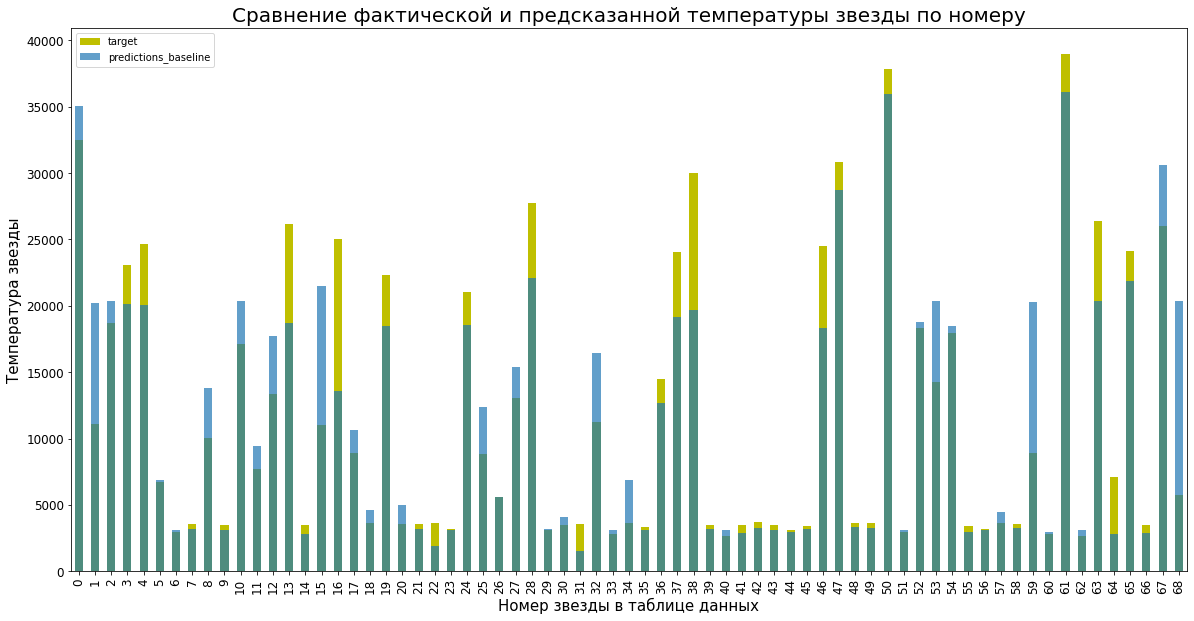

In [256]:
comparison = pd.DataFrame()
comparison['target'] = pd.DataFrame(y_test.reshape(-1,1).detach().numpy())[0]
comparison['predictions_baseline'] = pd.DataFrame(test_preds.reshape(-1,1).detach().numpy())[0]

plt.figure(figsize=(20,10))
comparison['target'].plot(kind='bar', color='y' , legend=True, fontsize=12)
comparison['predictions_baseline'].plot(kind='bar', alpha=0.7, legend=True, fontsize=12)
plt.title('Сравнение фактической и предсказанной температуры звезды по номеру', fontsize=20)
plt.ylabel('Температура звезды', fontsize=15)
plt.xlabel('Номер звезды в таблице данных', fontsize=15)
plt.show()

### Вывод

Разработали архитектуру  нейросети:

* На входном слое 12 нейронов,  на выходном - 1. 2 скрытых слоя, содержащих по 8 нейронов.

* Функция активации - Hardswish()

* Оптимизатор Adam() c параметром lr=0.009

*  Техника регуляризации - BatchNorm 

* Размер батча batch_size = 50

* Количество эпох - num_epochs = 450


При такой архитектуре RMSE на тестовых данных ниже 4500.



## Улучшение нейронной сети

Попробуем улучшить нейросеть при помощи техники  регуляризации Dropout: 

In [257]:
rmse_dropout = []

net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Hardswish(),
    #nn.ReLU(),
    nn.Dropout(),  
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    #nn.ReLU(),
    nn.Dropout(), 
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
    
)


optimizer = torch.optim.Adam(net.parameters(), lr=0.009)

loss = nn.MSELoss()

batch_size = 50

num_epochs = 450

num_batches = ceil(len(X_train)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(X_train)) # создали случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size # посчитали номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index : start_index + batch_size] # извлекли индексы объектов текущего обатча
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
     
        loss_value = loss(preds, y_batch)

        loss_value.backward()
       
        optimizer.step()

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(X_test)
        rmse = sqrt(mean_squared_error(y_test.detach().numpy(), test_preds.detach().numpy()))
        
        rmse_dropout.append(rmse)
        print(rmse)


15462.776464787945
15449.696954956755
15327.121060394871
14898.343532084364
14001.94672179551
12520.469000800249
10640.459012655421
8904.117249901868
7764.827106896843
7124.178268404013
6773.412433921324
6508.715387847283
6246.042907313397
5981.199210860645
5759.389898244432
5602.739865458685
5461.783774555708
5337.407235727849
5203.0052854095775
5113.040191510331
5084.85693014071
5004.514561873109
4972.437229367506
4919.213961599963
4909.931364082394
4914.5831969761175
4837.061918148247
4867.433615366521
4799.886248652149
4722.403413517316
4743.829887337867
4715.701856563877
4758.684271939041
4659.487954700602
4667.574530738636
4743.823984930301
4674.448630587355
4678.086147133248
4577.1762037308545
4613.985912418892
4611.538571886827
4712.3569474308715
4595.464938393067
4601.644271344755
4549.147612465438
4636.926352660779


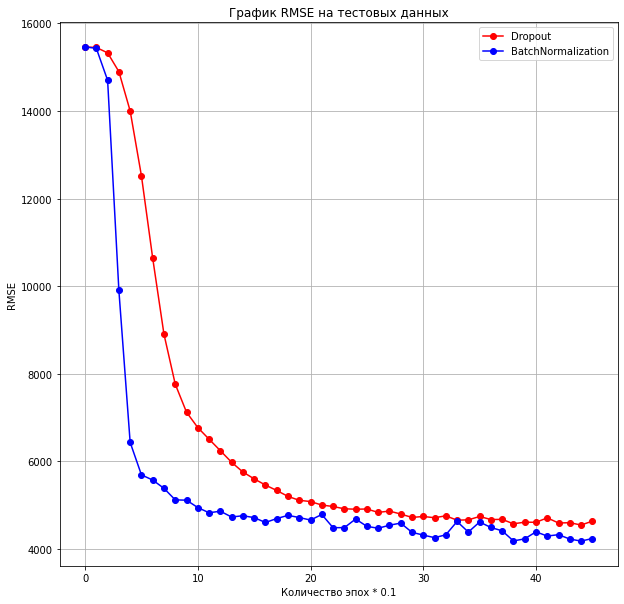

In [258]:
plt.figure(figsize=(10,10))
plt.plot(rmse_dropout,'o-', color='r', label='Dropout')
plt.plot(rmse_batch,'o-', color='b', label='BatchNormalization')
plt.title('График RMSE на тестовых данных')
plt.ylabel('RMSE')
plt.xlabel('Количество эпох * 0.1')
plt.ylim = ((3000, 11000))
plt.grid(True)
plt.legend()
plt.show()

Как видим, модель с техникой регуляризации Dropout обучилась немного хуже, чем BatchNormalization. 

Теперь попробуем улучшить модель, отрегулировав размер батча:


In [259]:
batch_size = [10, 20, 30 ,40 ,50, 60, 70, 80, 90, 100]
cols = ['batch_size', 'last_rmse', 'rmse_mean']

In [260]:
net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Hardswish(),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_1),  
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
    
)

In [261]:
rate_rmse = []
for size in batch_size:
    net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Hardswish(),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_1),  
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.Linear(n_hidden_neurons_2, n_out_neurons))
    
    optimizer = torch.optim.Adam(net.parameters(), lr=0.009)

    
    loss = nn.MSELoss()

    batch_size = size

    num_epochs = 450

    num_batches = ceil(len(X_train)/batch_size)

    rmse_mean = []
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train)) # создали случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size # посчитали номер стартового объекта батча
            optimizer.zero_grad()

            batch_indexes = order[start_index : start_index + batch_size] # извлекли индексы объектов текущего обатча
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = net.forward(X_batch).flatten()

            loss_value = loss(preds, y_batch)

            loss_value.backward()

            optimizer.step()

        if epoch % 10 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test)
            rmse = sqrt(mean_squared_error(y_test.detach().numpy(), test_preds.detach().numpy()))
            rmse_mean.append(rmse)

        if epoch == num_epochs - 1:
            rate_rmse.append([size, rmse, np.mean(rmse_mean)])
            print(size, rmse)
rmse_compare = pd.DataFrame(data = rate_rmse, columns=cols)

10 4270.928470485077
20 4205.408184706926
30 3904.5341591539445
40 4342.910775044774
50 4117.898250321394
60 4381.6451248361045
70 4450.370321669872
80 4566.432962389791
90 4501.737886638893
100 4094.122983008693


Выведем сравнительную таблицу:

In [262]:
rmse_compare = pd.DataFrame(data = rate_rmse, columns=cols)
rmse_compare['rmse_diff'] = rmse_compare['rmse_mean'] - rmse_compare['last_rmse']

rmse_compare

,batch_size,last_rmse,rmse_mean,rmse_diff
0,10,4270.928470,4588.239999,317.311529
1,20,4205.408185,4929.336040,723.927855
2,30,3904.534159,4882.656835,978.122676
3,40,4342.910775,5401.626288,1058.715513
4,50,4117.898250,5457.672372,1339.774122
5,60,4381.645125,5687.282247,1305.637122
6,70,4450.370322,5728.820783,1278.450461
7,80,4566.432962,6233.399531,1666.966569
8,90,4501.737887,6369.003079,1867.265193
9,100,4094.122983,6101.303159,2007.180176


In [263]:
rmse_compare[rmse_compare['last_rmse'] == rmse_compare['last_rmse'].min() ]

,batch_size,last_rmse,rmse_mean,rmse_diff
2,30,3904.534159,4882.656835,978.122676


In [264]:
rmse_compare[rmse_compare['rmse_diff'] == rmse_compare['rmse_diff'].min() ]

,batch_size,last_rmse,rmse_mean,rmse_diff
0,10,4270.92847,4588.239999,317.311529


Лучший показатель RMSE достигается при размере батча = 30.

Обучим нейронную сеть с отобранными параметрами:

In [269]:
net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Hardswish(),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_1),  
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    #nn.ReLU(),
    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
    
)

In [270]:
rmse_optimized = []


optimizer = torch.optim.Adam(net.parameters(), lr=0.009)

loss = nn.MSELoss()

batch_size = 30

num_epochs = 450

num_batches = ceil(len(X_train)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(X_train)) # создали случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size # посчитали номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index : start_index + batch_size] # извлекли индексы объектов текущего обатча
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
     
        loss_value = loss(preds, y_batch)

        loss_value.backward()
       
        optimizer.step()

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(X_test)
        rmse = sqrt(mean_squared_error(y_test.detach().numpy(), test_preds.detach().numpy()))
        rmse_optimized.append(rmse)

        print(rmse)

15462.752148307882
15241.219898682652
9643.398156251767
6389.190246032747
5909.817594477853
5748.021746653365
5343.454687746495
5118.599808541395
4985.811869695847
4908.531756034588
4744.156405516159
4756.760662467684
4633.907422467566
4565.729952592465
4544.7763421317
4504.868033583226
4440.953951573918
4398.809384367547
4544.929262375818
4389.561253701787
4300.520666151949
4346.137365523552
4283.832863219573
4263.901030746375
4314.516890684286
4328.031885279959
4393.083199758456
4264.165099993198
4255.040540347412
4212.677295972242
4350.051493948089
4348.721881196819
4218.386421370143
4249.068839169354
4364.256637733395
4223.584259843765
4258.051197437626
4147.997589198913
4220.1336471728
4183.908937823576
4146.136997254191
4201.162220148134
4186.985550488561
4366.590660916134
4320.696703079261
4130.134138257497


Выведем сравнение фактической и предсказанной температуры звезды по номеру моделей baseline и улучшенной:

<Figure size 1440x720 with 0 Axes>

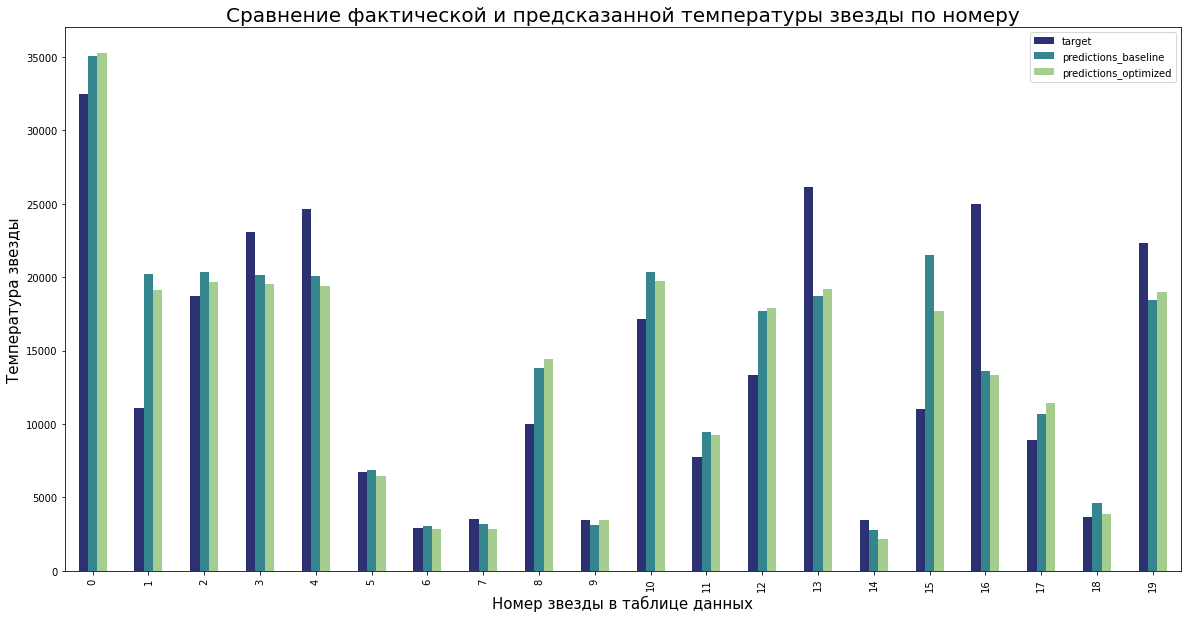

In [271]:
comparison_optimized = pd.DataFrame()
comparison_optimized['target'] = pd.DataFrame(y_test.reshape(-1,1).detach().numpy())[0]
comparison_optimized['predictions_optimized'] = pd.DataFrame(test_preds.reshape(-1,1).detach().numpy())[0]
comparison['predictions_optimized'] = comparison_optimized['predictions_optimized']

plt.figure(figsize=(20,10))

comparison.head(20).plot.bar(figsize=(20,10),  colormap='crest_r')
plt.title('Сравнение фактической и предсказанной температуры звезды по номеру', fontsize=20)

plt.ylabel('Температура звезды', fontsize=15)
plt.xlabel('Номер звезды в таблице данных', fontsize=15)
plt.show()

Для сравнения эффективности нейросетей выведем графики RMSE на тестовых данных для улучшенной нейросети и нейронной сети - baseline:

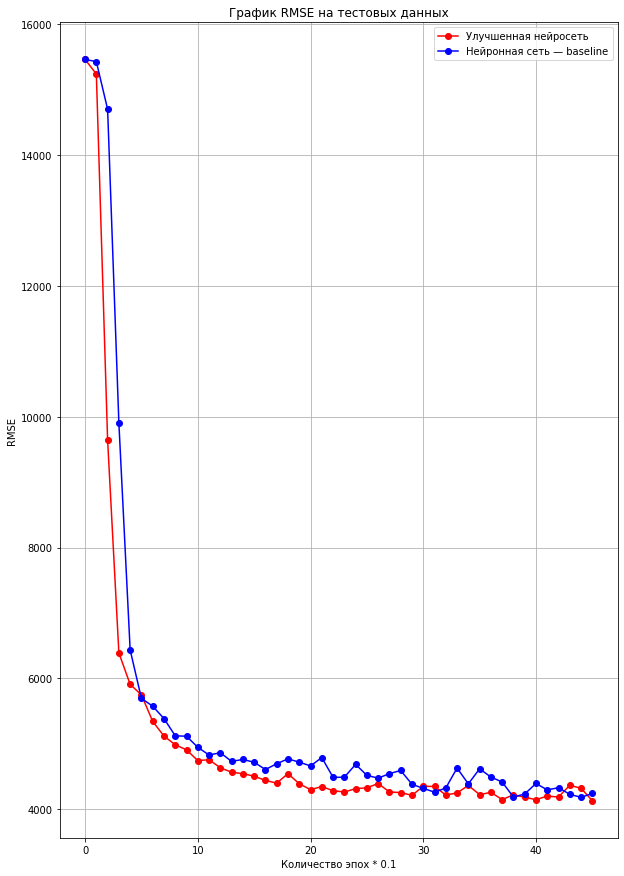

In [272]:
plt.figure(figsize=(10,15))
plt.plot(rmse_optimized,'o-', color='r', label='Улучшенная нейросеть')
plt.plot(rmse_batch,'o-', color='b', label='Нейронная сеть — baseline')
plt.title('График RMSE на тестовых данных')
plt.ylabel('RMSE')
plt.xlabel('Количество эпох * 0.1')
plt.grid(True)
plt.legend()
plt.show()

Как видим, улучшенная нейронная сеть обучилась лучше, чем базовая.

### Вывод

В этой части работы мы произвели улучшение нейросети. Основным фактором, позволившим улучшить нейросеть стало изменение размера батча с 50 до 30.

При этом замена техники регуляризации с BatchNormalization на Dropout дала ухудшение результатов нейросети, поэтому в финальной версии нейросети мы используем BatchNormalization. 

## Выводы

Архитектура базовой нейронной сети: 

* На входном слое 12 нейронов, на выходном - 1. 2 скрытых слоя, содержащих по 8 нейронов.

* Функция активации - Hardswish()

* Оптимизатор Adam() c параметром lr=0.009

* Техника регуляризации - BatchNorm

* **Размер батча batch_size = 50**

* Количество эпох - num_epochs = 450



Архитектура улучшенной нейросети:


* На входном слое 12 нейронов, на выходном - 1. 2 скрытых слоя, содержащих по 8 нейронов.

* Функция активации - Hardswish()

* Оптимизатор Adam() c параметром lr=0.009

* Техника регуляризации - BatchNorm

* **Размер батча batch_size = 30**

* Количество эпох - num_epochs = 450


Обе модели выполняют требование: величина RMSE в каждой ниже 4500. Однако улучшенная модель обучается лучше. Ее RMSE находится на уровне 4200-4300.